In [1]:
import re
import numpy as np
from scipy.spatial import distance
import math
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [2]:
f = open('sentences.txt', 'r')
list = f.read()
string = list.lower()
string = re.split('[^a-z]', string)
string_clear = [i for i in string if i != '']
print(string_clear)

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process', 'as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes', 'a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output', 'cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals', 'in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin', 'the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 'that',

In [3]:
words_dict = {}
j = 0
for i in string_clear:
    if i not in words_dict:
        words_dict.update({i:j})
        j+=1
    
print(words_dict.items())

dict_items([('in', 0), ('comparison', 1), ('to', 2), ('dogs', 3), ('cats', 4), ('have', 5), ('not', 6), ('undergone', 7), ('major', 8), ('changes', 9), ('during', 10), ('the', 11), ('domestication', 12), ('process', 13), ('as', 14), ('cat', 15), ('simply', 16), ('catenates', 17), ('streams', 18), ('of', 19), ('bytes', 20), ('it', 21), ('can', 22), ('be', 23), ('also', 24), ('used', 25), ('concatenate', 26), ('binary', 27), ('files', 28), ('where', 29), ('will', 30), ('just', 31), ('sequence', 32), ('a', 33), ('common', 34), ('interactive', 35), ('use', 36), ('for', 37), ('single', 38), ('file', 39), ('is', 40), ('output', 41), ('content', 42), ('standard', 43), ('hear', 44), ('sounds', 45), ('too', 46), ('faint', 47), ('or', 48), ('high', 49), ('frequency', 50), ('human', 51), ('ears', 52), ('such', 53), ('those', 54), ('made', 55), ('by', 56), ('mice', 57), ('and', 58), ('other', 59), ('small', 60), ('animals', 61), ('one', 62), ('people', 63), ('deliberately', 64), ('tamed', 65), ('a

In [4]:
strings = list.lower().splitlines()
strings = [re.split('[^a-z]', i) for i in strings ]
strings_clear = [[i for i in j if i != ''] for j in strings]
print(strings_clear)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

In [5]:
matr = np.array([[0 for i in words_dict.items()] for j in strings_clear])
num = 0
for i in strings_clear:
    for j in i:
        matr[num,words_dict[j]]+=1
    num+=1
print (matr)

[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 1 1]]


In [6]:
for i in matr:
    print (distance.cosine(matr[0],i))

0.0
0.9527544408738466
0.8644738145642124
0.8951715163278082
0.7770887149698589
0.9402385695332803
0.7327387580875756
0.9258750683338899
0.8842724875284311
0.9055088817476932
0.8328165362273942
0.8804771390665607
0.8396432548525454
0.8703592552895671
0.8740118423302576
0.9442721787424647
0.8406361854220809
0.956644501523794
0.9442721787424647
0.8885443574849294
0.8427572744917122
0.8250364469440588


f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [7]:
f = lambda x: math.sin(x/5)*math.exp(x/10)+5*math.exp(-x/2)
x = range(1,15)
fx = np.array([f(i) for i in x])
print (fx)

[3.25221687 2.31503384 1.87783842 1.74684595 1.7977761  1.94722128
 2.13543898 2.31617016 2.45082365 2.50541641 2.44929128 2.2550105
 1.89904466 1.36300335]


In [8]:
A = np.array([[1,1],[1,15]])
b = np.array([f(1),f(15)])
X = solve(A,b)
print(X)
F = lambda x: X[0]+X[1]*x
FX = np.array([F(i) for i in x])
print (FX)

[ 3.43914511 -0.18692825]
[3.25221687 3.06528862 2.87836037 2.69143213 2.50450388 2.31757563
 2.13064739 1.94371914 1.7567909  1.56986265 1.3829344  1.19600616
 1.00907791 0.82214967]


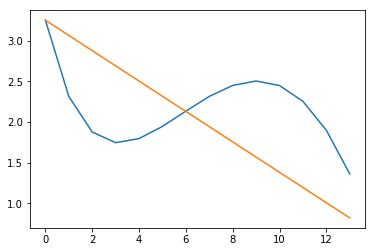

In [9]:
plt.plot(fx)
plt.plot(FX)

[ 3.32512949 -0.06531159 -0.00760104]
[3.25221687 3.16410215 3.06078536 2.94226649 2.80854553 2.65962249
 2.49549736 2.31617016 2.12164087 1.9119095  1.68697605 1.44684052
 1.1915029  0.9209632 ]


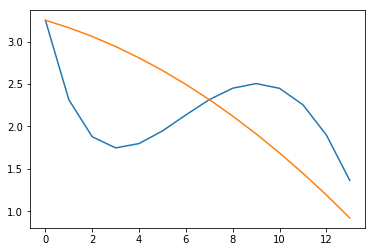

In [10]:
A = np.array([[1,1,1],[1,8,8*8],[1,15,15*15]])
b = np.array([f(1),f(8),f(15)])
X = solve(A,b)
print(X)
F = lambda x: X[0]+X[1]*x+X[2]*x*x
FX = np.array([F(i) for i in x])
print (FX)
plt.plot(fx)
plt.plot(FX)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
[3.25221687 2.47905198 1.99373298 1.74684595 1.68897699 1.77071218
 1.94263763 2.15533942 2.35940365 2.50541641 2.54396379 2.42563189
 2.1010068  1.52067461]


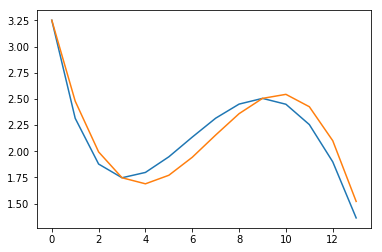

In [14]:
A = np.array([[1,1,1,1],[1,4,4*4,4 ** 3],[1,10,10*10,10 ** 3],[1,15,15*15,15*15*15]])
b = np.array([f(1),f(4),f(10),f(15)])
X = solve(A,b)
print(X)
F = lambda x: X[0]+X[1]*x+X[2]*x*x+X[3]*x*x*x
FX = np.array([F(i) for i in x])
print (FX)
plt.plot(fx)
plt.plot(FX)

In [12]:
print(b)

[3.25221687 1.74684595 2.50541641 0.63522142]
